In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


amazon_sales= 'Amazon Sale Report.csv' 

sales=pd.read_csv(amazon_sales)
#sales = sales.drop(columns=['Unnamed: 22'])
    
#Drop both 'fulfilled-by' and 'Unnamed: 22' 
sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])


# Function to display initial data overview
def data_overview(df, name):
    print(f"\nOverview of {name} dataset:")
    print(df.info())
    print(df.head())
    print(f"\nNumber of duplicates in {name}: {df.duplicated().sum()}")
    print(f"Missing values in {name}:\n{df.isnull().sum()}\n")
    
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)

# Calculate the mean and median of the 'Amount' column 
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
# Replace missing values in 'Amount' with the mean since 6.04% are null
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace missing values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)

# Replace NaN values in 'promotion-ids' with 'None'
sales['promotion-ids'] = sales['promotion-ids'].fillna('None')


sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['Fulfilment'] = sales['Fulfilment'].astype('category')
sales.columns = sales.columns.str.strip()

# List of columns to convert to 'category' type
columns_to_convert = ['Fulfilment', 'Sales Channel', 'ship-service-level']

# Convert the columns to 'category' type
sales[columns_to_convert] = sales[columns_to_convert].astype('category')
     
    
# Display initial data overviews
#data_overview(sales, "sales")



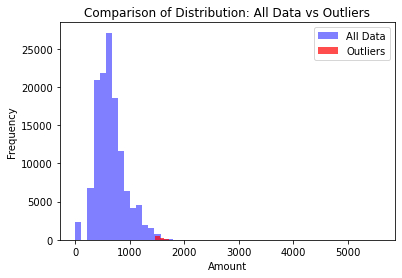

In [7]:
# Plot histogram of entire data
plt.hist(sales['Amount'], bins=50, color='blue', alpha=0.5, label='All Data')


from scipy.stats import zscore

sales['z_score'] = zscore(sales['Amount'])
outliers = sales[sales['z_score'].abs() > 3]
# Plot histogram of outliers
plt.hist(outliers['Amount'], bins=50, color='red', alpha=0.7, label='Outliers')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Distribution: All Data vs Outliers')
plt.legend()
plt.show()

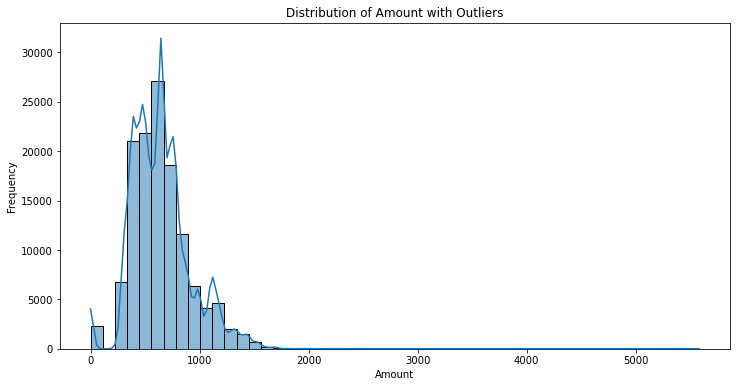

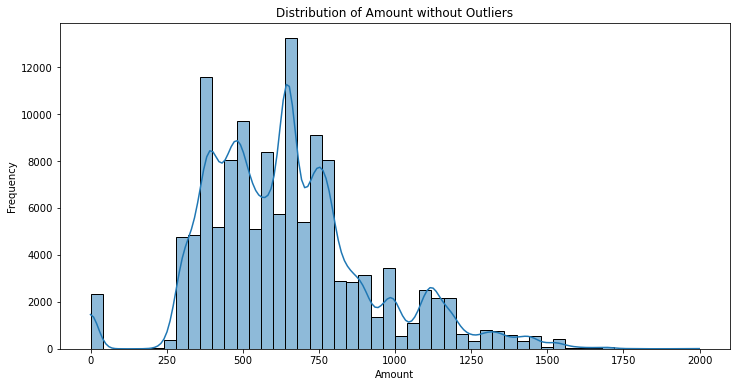

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution with outliers
plt.figure(figsize=(12, 6))
sns.histplot(sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount with Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Assuming outliers are those greater than 3000 (example threshold)
filtered_sales = sales[sales['Amount'] <= 2000]


# Plot distribution without outliers
plt.figure(figsize=(12, 6))
sns.histplot(filtered_sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount without Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Filter the data
filtered_sales = sales[sales['Amount'] <= 2000]
# Group by date and sum the sales
daily_sales_filtered = filtered_sales.groupby('Date')['Amount'].sum()


# Get the min and max values for scaling
min_y_filtered = daily_sales_filtered.min()
max_y_filtered = daily_sales_filtered.max()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales_filtered.index, daily_sales_filtered.values)
plt.title('Total Sales Per Day (Filtered Data: Amount <= $2000)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.ylim(0, max(max_y_filtered, max_y_all)+20000)  # Set y-axis limits
plt.show()


daily_sales = sales.groupby('Date')['Amount'].sum().reset_index()


# Get the min and max values for scaling
min_y_all = daily_sales['Amount'].min()
max_y_all = daily_sales['Amount'].max()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Amount'], marker='o')
plt.title('Total Sales Per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.ylim(0, max(max_y_filtered, max_y_all)+20000)  # Set y-axis limits
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'max_y_all' is not defined

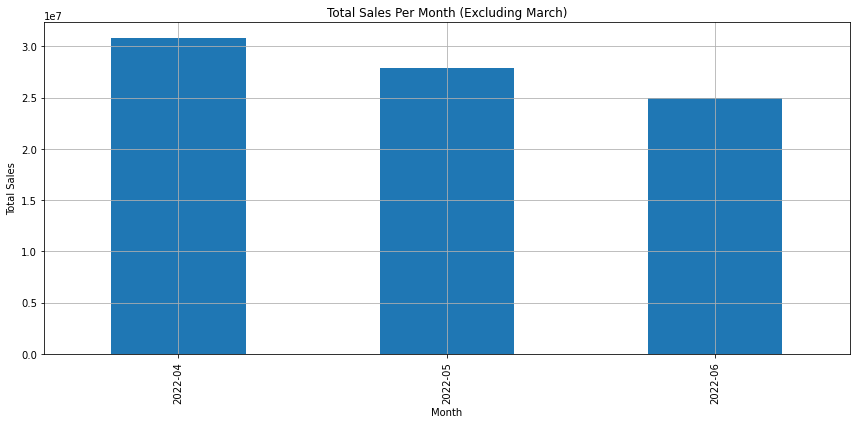

In [10]:
# Filter out sales data for March
sales_filtered = sales[~sales['Date'].dt.month.isin([3])]

# Group by month and sum the sales
monthly_sales_filtered = sales_filtered.groupby(sales_filtered['Date'].dt.to_period('M'))['Amount'].sum()

# Plot monthly sales excluding March
plt.figure(figsize=(12, 6))
monthly_sales_filtered.plot(kind='bar')
plt.title('Total Sales Per Month (Excluding March)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

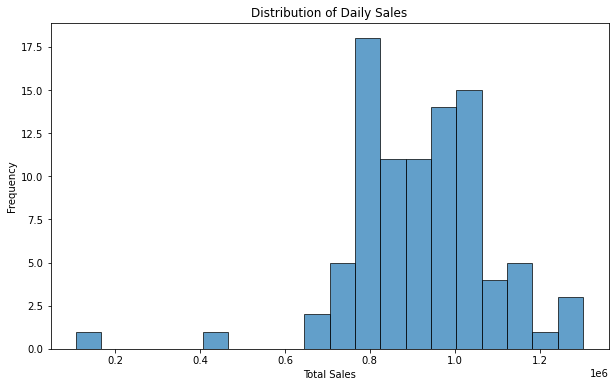

In [11]:
import matplotlib.pyplot as plt

# Plot histogram of daily sales
plt.figure(figsize=(10, 6))
plt.hist(daily_sales_filtered, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Daily Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


7195
count           128975
unique            7195
top       JNE3797-KR-L
freq               773
Name: SKU, dtype: object


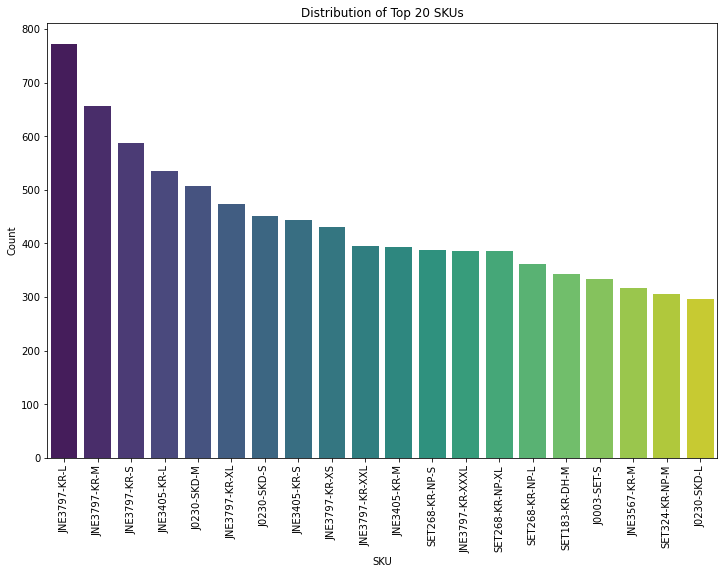

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each SKU
sku_counts = sales['SKU'].value_counts()

print(sales['SKU'].nunique())
print(sales['SKU'].describe())

# Filter for the top 20 SKUs if necessary
top_20_skus = sku_counts.head(20).reset_index()
top_20_skus.columns = ['SKU', 'Count']

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='SKU', y='Count', data=top_20_skus, palette='viridis')
plt.title('Distribution of Top 20 SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()


In [13]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=sku_counts, color='skyblue')
plt.title('Box Plot of SKU Counts')
plt.xlabel('Count')
plt.show()


In [14]:
# Display the top 10 most common SKUs
top_skus = sku_counts.head(15)
print(top_skus)


JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
JNE3797-KR-XL      474
J0230-SKD-S        452
JNE3405-KR-S       443
JNE3797-KR-XS      431
JNE3797-KR-XXL     395
JNE3405-KR-M       394
SET268-KR-NP-S     387
JNE3797-KR-XXXL    386
SET268-KR-NP-XL    386
SET268-KR-NP-L     362
Name: SKU, dtype: int64


In [15]:
# Get the count of each unique SKU
sku_counts = sales['SKU'].value_counts()
print(sku_counts)


JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
                  ... 
BTM004-XXXL          1
BL090-XS             1
BTM045-PP-M          1
SET034-KR-NP-XS      1
SET045-KR-NP-M       1
Name: SKU, Length: 7195, dtype: int64


                      SKU       Category  Qty currency   Amount
11160      J0013-SKD-XXXL            Set    5      INR  5495.00
24494    SET397-KR-NP  -M            Set    0      INR  4235.72
28814         J0285-SKD-S            Set    2      INR  2864.00
39944       JNE3797-KR-XS  Western Dress    4      INR  2860.00
42039     SET268-KR-NP-XS            Set    8      INR  5584.00
54605        J0341-DR-XXL  Western Dress    3      INR  2655.00
56307         J0238-LCD-L            Set    1      INR  2598.00
63974        J0230-SKD-XL            Set    2      INR  2698.00
67764        J0238-LCD-XL            Set    1      INR  2598.00
69527         J0238-LCD-L            Set    1      INR  2598.00
75760    SET364-KR-NP-XXL            Set    2      INR  2676.00
79899    JNE2086-KR-389-M          kurta    4      INR  2796.00
89150      SET197-KR-NP-M            Set    4      INR  3036.00
112946       J0238-LCD-XL            Set    1      INR  2598.00
114176       J0238-LCD-XL            Set

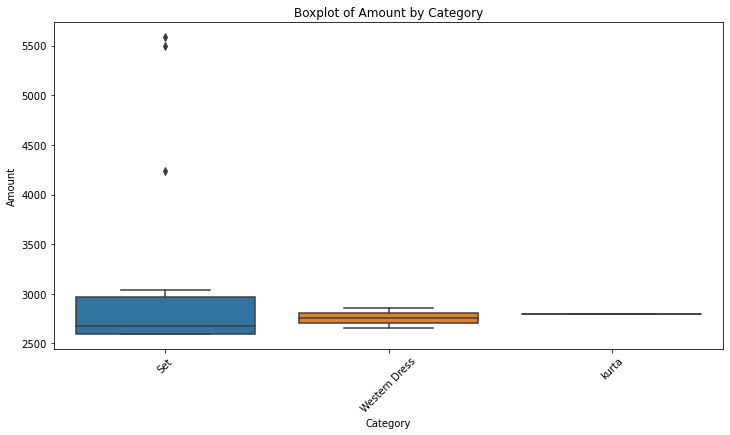

Average Amount per Category:
 Category
Set              3182.314667
Western Dress    2757.500000
kurta            2796.000000
Name: Amount, dtype: float64
 Median Amount per Category:
 Category
Set              2676.0
Western Dress    2757.5
kurta            2796.0
Name: Amount, dtype: float64
Average Amount per SKU:
 SKU
J0013-SKD-XXXL       5495.00
J0230-SKD-XL         2698.00
J0238-LCD-L          2598.00
J0238-LCD-S          2598.00
J0238-LCD-XL         2598.00
J0285-SKD-S          2864.00
J0341-DR-XXL         2655.00
JNE2086-KR-389-M     2796.00
JNE3797-KR-XS        2860.00
SET197-KR-NP-M       3036.00
SET268-KR-NP-XS      5584.00
SET278-KR-NP-XXXL    2894.00
SET364-KR-NP-XXL     2676.00
SET374-KR-NP-XXL     2664.00
SET397-KR-NP  -M     4235.72
Name: Amount, dtype: float64
Median Amount per SKU:
 SKU
J0013-SKD-XXXL       5495.00
J0230-SKD-XL         2698.00
J0238-LCD-L          2598.00
J0238-LCD-S          2598.00
J0238-LCD-XL         2598.00
J0285-SKD-S          2864.00
J0341-DR-X

In [16]:
# Define the amount threshold for outliers
threshold = 2500

# Filter rows with 'Amount' above the threshold
outlier_rows = sales[sales['Amount'] > threshold]

# Display the rows
print(outlier_rows[['SKU', 'Category', 'Qty', 'currency', 'Amount']])

# Summary statistics for high-value rows
summary_stats = outlier_rows[['Amount', 'Qty']].describe()
print(summary_stats)

# Check for unique categories or SKUs
unique_categories = outlier_rows['Category'].unique()
unique_skus = outlier_rows['SKU'].unique()
print("Unique Categories:", unique_categories)
print("Unique SKUs:", unique_skus)


import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Amount for outliers
plt.figure(figsize=(12, 6))
sns.histplot(outlier_rows['Amount'], kde=True, bins=30)
plt.title('Distribution of High-Value Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=outlier_rows)
plt.title('Boxplot of Amount by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

# Check average amount per category
average_amount_per_category = outlier_rows.groupby('Category')['Amount'].mean()
print("Average Amount per Category:\n", average_amount_per_category)

median_amount_per_category = outlier_rows.groupby('Category')['Amount'].median()
print(" Median Amount per Category:\n", median_amount_per_category)

# Check average amount per SKU
average_amount_per_sku = outlier_rows.groupby('SKU')['Amount'].mean()
print("Average Amount per SKU:\n", average_amount_per_sku)


median_amount_per_sku = outlier_rows.groupby('SKU')['Amount'].median()
print("Median Amount per SKU:\n", median_amount_per_sku)





In [17]:
outlier_sales = sales[sales['Amount'] >= 2500]
print(outlier_sales)

print(sales['Category'])

         index             Order ID       Date                        Status  \
11160    11160  403-4106553-1691525 2022-04-23  Shipped - Delivered to Buyer   
24494    24494  407-3483041-9133135 2022-04-16                     Cancelled   
28814    28814  408-9885439-6698733 2022-04-13                       Shipped   
39944    39944  408-3363121-6123562 2022-04-06  Shipped - Delivered to Buyer   
42039    42039  402-5239558-4281957 2022-04-05                       Shipped   
54605    54605  171-9419863-7830701 2022-05-27                       Shipped   
56307    56307  405-5657207-4685151 2022-05-26  Shipped - Delivered to Buyer   
63974    63974  408-9361250-7029128 2022-05-19                       Shipped   
67764    67764  402-0603541-4663511 2022-05-16  Shipped - Delivered to Buyer   
69527    69527  406-0207843-8044301 2022-05-15  Shipped - Delivered to Buyer   
75760    75760  402-9141667-1791537 2022-05-10                     Cancelled   
79899    79899  405-6877720-7865168 2022

In [18]:
# Count the number of non-null values in the 'Amount' column
num_values = sales['Amount'].count()

print(f"Number of values in 'Amount' column: {num_values}")



outlier_percentage=len(outliers)/num_values

print(outlier_percentage)

Number of values in 'Amount' column: 128975
0.007334754797441364


241
count    5323.000000
mean       24.229758
std        62.807159
min         1.000000
25%         3.000000
50%         9.000000
75%        22.000000
max      2017.000000
Name: Simplified_SKU, dtype: float64


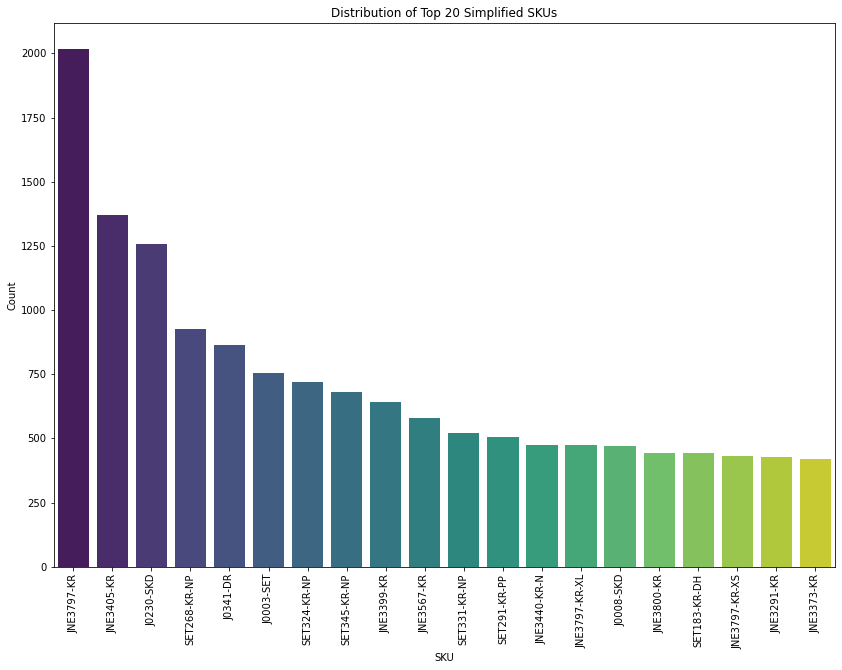

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove '-S', '-M', '-L' suffixes from the SKU column
sales['Simplified_SKU'] = sales['SKU'].str.replace(r'-(S|M|L)$', '', regex=True)

# Get the counts of each simplified SKU
simplified_sku_counts = sales['Simplified_SKU'].value_counts()

# Output the number of unique simplified SKUs
print(simplified_sku_counts.nunique())

# Describe the distribution of simplified SKUs
print(simplified_sku_counts.describe())

# Filter for the top 20 simplified SKUs if necessary
top_20_simplified_skus = simplified_sku_counts.head(20).reset_index()
top_20_simplified_skus.columns = ['SKU', 'Count']

# Plot the distribution of the simplified SKUs
plt.figure(figsize=(14, 10))
sns.barplot(x='SKU', y='Count', data=top_20_simplified_skus, palette='viridis')
plt.title('Distribution of Top 20 Simplified SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()


In [20]:
# Get the counts of each SKU
simplified_sku_counts = sales['Simplified_SKU'].value_counts()

print(simplified_sku_counts.nunique())
print(simplified_sku_counts.describe())
print(simplified_sku_counts.head(15))

241
count    5323.000000
mean       24.229758
std        62.807159
min         1.000000
25%         3.000000
50%         9.000000
75%        22.000000
max      2017.000000
Name: Simplified_SKU, dtype: float64
JNE3797-KR       2017
JNE3405-KR       1372
J0230-SKD        1256
SET268-KR-NP      925
J0341-DR          865
J0003-SET         754
SET324-KR-NP      721
SET345-KR-NP      680
JNE3399-KR        643
JNE3567-KR        579
SET331-KR-NP      520
SET291-KR-PP      504
JNE3440-KR-N      476
JNE3797-KR-XL     474
J0008-SKD         471
Name: Simplified_SKU, dtype: int64


In [21]:
# Filter the dataset for the specific SKU with each suffix
sku_s = sales[sales['SKU'] == 'JNE3797-KR-S']
sku_m = sales[sales['SKU'] == 'JNE3797-KR-M']
sku_l = sales[sales['SKU'] == 'JNE3797-KR-L']

# Calculate the total count for the original SKU with each suffix
total_count = len(sku_s) + len(sku_m) + len(sku_l)

# Print the counts for each size
print(f"Count for JNE3797-KR-S: {len(sku_s)}")
print(f"Count for JNE3797-KR-M: {len(sku_m)}")
print(f"Count for JNE3797-KR-L: {len(sku_l)}")
print(f"Total count for JNE3797-KR: {total_count}")

# Verify if the total matches the simplified SKU count
if total_count == 2017:
    print("The counts match the simplified SKU total.")
else:
    print(f"The counts do not match. Total: {total_count}, Expected: 2017")


Count for JNE3797-KR-S: 587
Count for JNE3797-KR-M: 657
Count for JNE3797-KR-L: 773
Total count for JNE3797-KR: 2017
The counts match the simplified SKU total.


In [22]:

# Get the counts of each SKU
sku_counts = sales['SKU'].value_counts()

print(sales['SKU'].nunique())
print(sales['SKU'].describe())


print('Here is the unique count: ',len(sku_counts))

# List SKUs in alphabetical order
sorted_skus = sales['SKU'].sort_values()

# Sort SKUs alphabetically and ensure uniqueness
unique_sorted_skus = sales['SKU'].drop_duplicates().sort_values()

# Display the sorted, unique SKUs
print(unique_sorted_skus.head(50))  # Display the first 50 for inspection


# Display the sorted SKUs
#print(sorted_skus.head(50))  # Display the first 50 for inspection


7195
count           128975
unique            7195
top       JNE3797-KR-L
freq               773
Name: SKU, dtype: object
Here is the unique count:  7195
38234           AN201-RED-M
94820          AN201-RED-XL
87100         AN201-RED-XXL
40667        AN202-ORANGE-M
34609        AN202-ORANGE-S
17182      AN202-ORANGE-XXL
62961      AN203-MAROON-XXL
52737        AN204-PURPLE-L
93351        AN204-PURPLE-M
106694       AN204-PURPLE-S
68861       AN204-PURPLE-XL
93593      AN204-PURPLE-XXL
42665        AN205-YELLOW-S
70412       AN205-YELLOW-XL
98093      AN205-YELLOW-XXL
38742         AN206-GREEN-M
92677         AN206-GREEN-S
94818        AN206-GREEN-XL
59487          AN207-PINK-L
110220         AN207-PINK-S
62962        AN207-PINK-XXL
62471       AN208-MUSTARD-L
35701       AN208-MUSTARD-M
24236       AN208-MUSTARD-S
38370      AN208-MUSTARD-XL
10313     AN208-MUSTARD-XXL
40848        AN209-BIEGE-XL
87549       AN209-BIEGE-XXL
51723          AN210-NAVY-M
97247         AN210-NAVY-XL
56109 

In [23]:
# Display a few SKUs with different suffixes and their counts
sku_sample = sales['SKU'].drop_duplicates()
print(sku_sample[sku_sample.str.contains('AN201')])  # Example for checking 'AN201'


38234      AN201-RED-M
87100    AN201-RED-XXL
94820     AN201-RED-XL
Name: SKU, dtype: object


Unique simplified SKU count: 1496
count    1496.000000
mean       86.213235
std       196.377489
min         1.000000
25%         7.000000
50%        29.000000
75%        86.000000
max      3703.000000
Name: Simplified_SKU, dtype: float64
             SKU  Count
0     JNE3797-KR   3703
1     JNE3405-KR   2263
2      J0230-SKD   1868
3   SET268-KR-NP   1860
4       J0341-DR   1630
5      J0003-SET   1627
6   SET324-KR-NP   1284
7   SET345-KR-NP   1250
8     JNE3373-KR   1173
9     JNE3399-KR   1049
10  JNE3440-KR-N    995
11  SET331-KR-NP    966
12    JNE3567-KR    896
13    JNE3291-KR    865
14  SET291-KR-PP    855
15      J0339-DR    842
16    JNE3368-KR    841
17     J0008-SKD    831
18      J0119-TP    813
19    JNE3801-KR    798


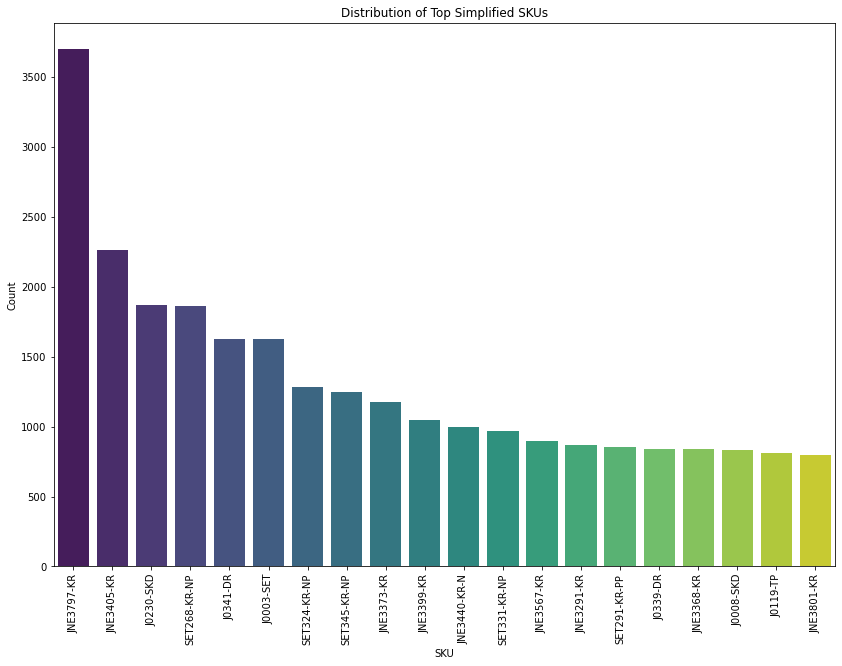

In [24]:
import pandas as pd

# Assuming you have the DataFrame 'sales'
# Example DataFrame creation for demonstration
# sales = pd.DataFrame({'SKU': [...]}) 

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Remove size suffixes from the SKU column
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Get the counts of each simplified SKU
simplified_sku_counts = sales['Simplified_SKU'].value_counts()

# Output the number of unique simplified SKUs
print("Unique simplified SKU count:", len(simplified_sku_counts))

# Describe the distribution of simplified SKUs
print(simplified_sku_counts.describe())

# Optionally, if you want to see the top simplified SKUs
top_simplified_skus = simplified_sku_counts.head(20).reset_index()
top_simplified_skus.columns = ['SKU', 'Count']


print(top_simplified_skus)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the simplified SKUs
plt.figure(figsize=(14, 10))
sns.barplot(x='SKU', y='Count', data=top_simplified_skus, palette='viridis')
plt.title('Distribution of Top Simplified SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()





In [25]:
print(sales['Category'].unique())

['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']


In [26]:
print(sales['Simplified_SKU'].describe())





count         128975
unique          1496
top       JNE3797-KR
freq            3703
Name: Simplified_SKU, dtype: object


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'sales' DataFrame includes 'Category' and 'Simplified_SKU'
# Group by 'Simplified_SKU' and 'Category'
sku_category_counts = sales.groupby(['Category', 'Simplified_SKU']).size().reset_index(name='Count')

# Summarize by Category to see the distribution of SKUs within each Category
category_summary = sku_category_counts.groupby('Category')['Count'].sum().reset_index()

# Print the summary
print(category_summary)

# Plot the distribution of SKUs by category
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Category', data=category_summary, palette='viridis')
plt.title('Distribution of Simplified SKUs by Product Category')
plt.xlabel('Total Count of Simplified SKUs')
plt.ylabel('Product Category')
plt.show()


        Category  Count
0         Blouse    926
1         Bottom    440
2        Dupatta      3
3   Ethnic Dress   1159
4          Saree    164
5            Set  50284
6            Top  10622
7  Western Dress  15500
8          kurta  49877


In [28]:
import pandas as pd

# Assuming 'sales' DataFrame contains 'Simplified_SKU' and 'Category'
# Group by 'Simplified_SKU' and get the associated 'Category'
sku_category_mapping = sales.groupby('Simplified_SKU')['Category'].unique().reset_index()

# Display the result
print(sku_category_mapping)


     Simplified_SKU  Category
0         AN201-RED  [Bottom]
1      AN202-ORANGE  [Bottom]
2      AN203-MAROON  [Bottom]
3      AN204-PURPLE  [Bottom]
4      AN205-YELLOW  [Bottom]
...             ...       ...
1491   SET445-KR-NP     [Set]
1492   SET446-KR-NP     [Set]
1493   SET449-KR-NP     [Set]
1494   SET461-KR-NP     [Set]
1495   SET462-KR-NP     [Set]

[1496 rows x 2 columns]


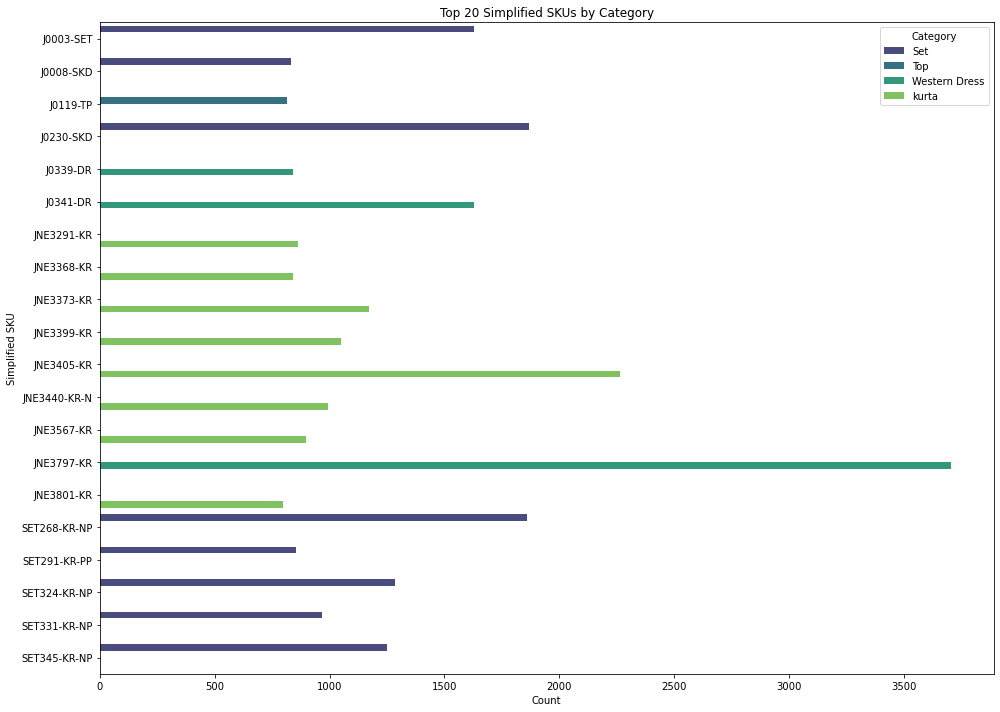

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# sales = pd.DataFrame({'SKU': [...], 'Category': [...]})

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Function to remove size suffixes from SKUs
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

# Apply the function to create the 'Simplified_SKU' column
sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Group by 'Simplified_SKU' and 'Category', and get the counts
sku_category_counts = sales.groupby(['Simplified_SKU', 'Category']).size().reset_index(name='Count')

# Get the top 20 SKUs by count
top_skus = sku_category_counts.groupby('Simplified_SKU')['Count'].sum().nlargest(20).index
top_sku_category_counts = sku_category_counts[sku_category_counts['Simplified_SKU'].isin(top_skus)]

# Plot the top 20 SKUs with their categories
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Simplified_SKU', hue='Category', data=top_sku_category_counts, palette='viridis')

# Add titles and labels
plt.title('Top 20 Simplified SKUs by Category')
plt.xlabel('Count')
plt.ylabel('Simplified SKU')

# Adjust legend and layout
plt.legend(title='Category', loc='upper right')  # Move legend to the top right
plt.tight_layout()

# Show the plot
plt.show()


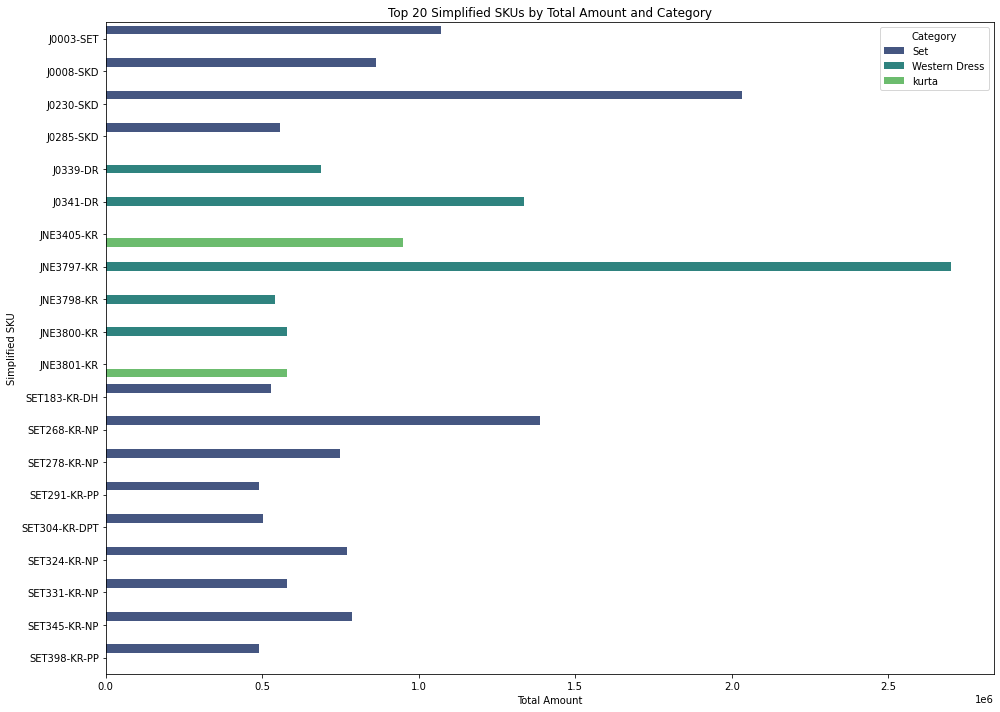

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame
# sales = pd.DataFrame({'SKU': [...], 'Amount': [...], 'Category': [...]})

# Define a list of size suffixes to remove
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']

# Function to remove size suffixes from SKUs
def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

# Apply the function to create the 'Simplified_SKU' column
sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

# Group by 'Simplified_SKU' and 'Category', and calculate the total amount
sku_category_amounts = sales.groupby(['Simplified_SKU', 'Category'])['Amount'].sum().reset_index(name='Total_Amount')

# Get the top 20 SKUs by total amount
top_skus_amount = sku_category_amounts.groupby('Simplified_SKU')['Total_Amount'].sum().nlargest(20).index
top_sku_category_amounts = sku_category_amounts[sku_category_amounts['Simplified_SKU'].isin(top_skus_amount)]

# Plot the top 20 SKUs with their categories by total amount
plt.figure(figsize=(14, 10))
sns.barplot(x='Total_Amount', y='Simplified_SKU', hue='Category', data=top_sku_category_amounts, palette='viridis')

# Add titles and labels
plt.title('Top 20 Simplified SKUs by Total Amount and Category')
plt.xlabel('Total Amount')
plt.ylabel('Simplified SKU')

# Adjust legend and layout
plt.legend(title='Category', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
